### First we import the csv file and print the head of the dataframe

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import find_peaks
# pd.options.display.width = 0
from IPython.display import display, HTML
# display(HTML("<style>.jp-Cell { width: 200% !important; }</style>"))

# Dataset from Brian Rock was downloaded February 2025 from https://www.kaggle.com/datasets/runningwithrock/2023-marathon-results?select=Results.csv
# Dataset Creative Commons license Attribution 4.0 International

df = pd.read_csv('Results.csv')
# print(df.head()) 
df

,Name,Race,Year,Gender,Age,Finish,Age Bracket
0,Arunas Jurkus,Salt Lake City Marathon,2023,M,55,12907,55-59
1,Seth Reed,Salt Lake City Marathon,2023,M,24,12921,Under 35
2,Mufaro Chivasa,Salt Lake City Marathon,2023,M,54,12948,50-54
3,Adam Cheney,Salt Lake City Marathon,2023,M,22,12954,Under 35
4,Michael Pyles,Salt Lake City Marathon,2023,M,33,12964,Under 35
...,...,...,...,...,...,...,...
429261,Ake Pangestuti,California International Marathon,2023,F,48,24807,45-49
429262,Lucy Chow,California International Marathon,2023,F,62,24916,60-64
429263,David Bry,California International Marathon,2023,M,68,25004,65-69
429264,Talia Davis,California International Marathon,2023,F,32,25036,Under 35


### Then we plot a distribution of marathon finish times by gender

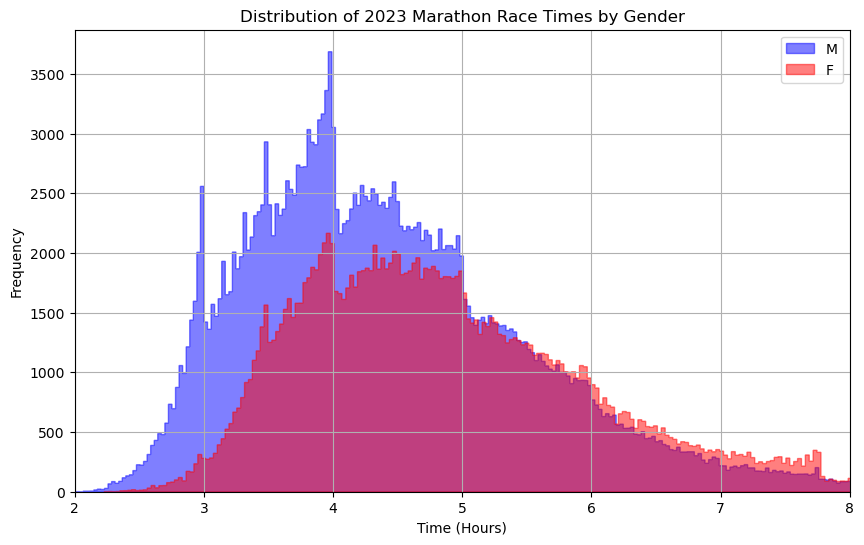

In [2]:
# Convert 'Result_hr' to timedelta
#df['Result_hr'] = pd.to_timedelta(df['Result_hr'])

# Calculate race times in hours
df['Result_hr_numeric'] = df['Finish'] / 3600
df

# Plot the distribution of race times by gender
plt.figure(figsize=(10, 6))

for gender, color in zip(['M', 'F'], ['blue', 'red']):
    gender_data = df[df['Gender'] == gender]['Result_hr_numeric']
    plt.hist(gender_data, bins=500, alpha=0.5, color=color, label=gender, edgecolor=color, histtype="stepfilled")

plt.xlabel('Time (Hours)')
plt.ylabel('Frequency')
plt.title('Distribution of 2023 Marathon Race Times by Gender')

plt.legend()
plt.grid(True)
plt.xlim(2, 8)
plt.show()

### Can we also show a line instead of the histogram bars? Yes with a kernel density estimation (KDE) plot:

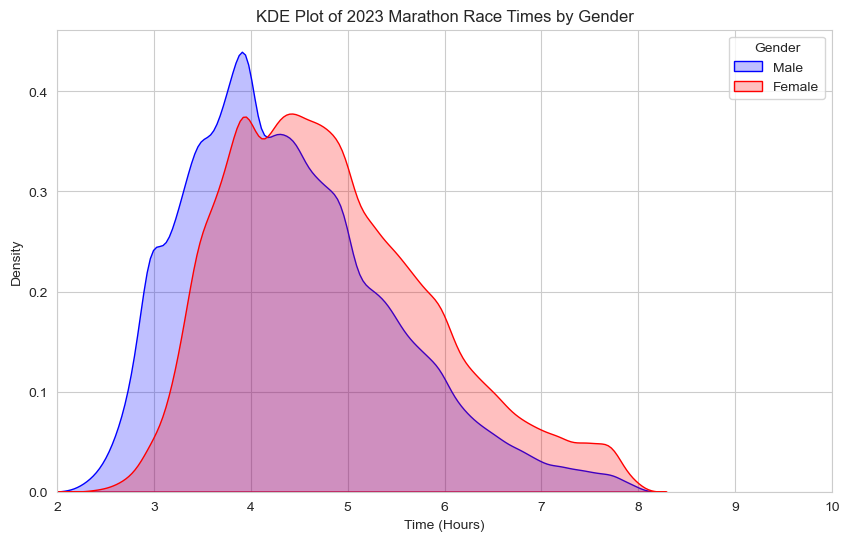

In [26]:
# Set up the Seaborn style
sns.set_style("whitegrid")

# Plot the KDE distribution of race times by gender
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['Gender'] == 'M'], x='Result_hr_numeric', label='Male', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=df[df['Gender'] == 'F'], x='Result_hr_numeric', label='Female', fill=True, common_norm=False, color='red')

plt.xlabel('Time (Hours)')
plt.ylabel('Density')
plt.title('KDE Plot of 2023 Marathon Race Times by Gender')

plt.legend(title='Gender')
plt.xlim(2, 10)
plt.show()

### Same plot without axis limits (gender difference is only about 1/30th of total range)

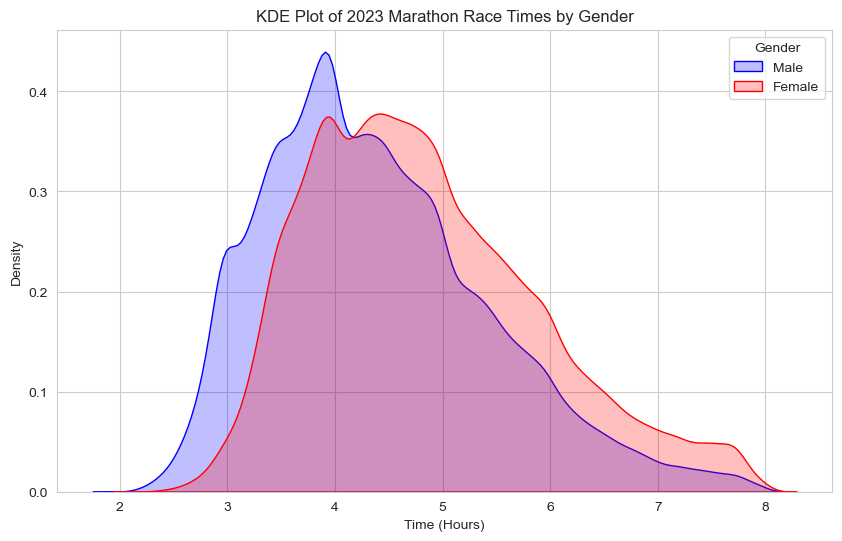

In [25]:
# Set up the Seaborn style
sns.set_style("whitegrid")

# Plot the KDE distribution of race times by gender
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['Gender'] == 'M'], x='Result_hr_numeric', label='Male', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=df[df['Gender'] == 'F'], x='Result_hr_numeric', label='Female', fill=True, common_norm=False, color='red')

plt.xlabel('Time (Hours)')
plt.ylabel('Density')
plt.title('KDE Plot of 2023 Marathon Race Times by Gender')

plt.legend(title='Gender')
# plt.xlim(2, 10)
plt.show()

### Let's plot age vs time . This will also help us to see outliers

In [5]:
df

,Name,Race,Year,Gender,Age,Finish,Age Bracket,Result_hr_numeric
0,Arunas Jurkus,Salt Lake City Marathon,2023,M,55,12907,55-59,3.585278
1,Seth Reed,Salt Lake City Marathon,2023,M,24,12921,Under 35,3.589167
2,Mufaro Chivasa,Salt Lake City Marathon,2023,M,54,12948,50-54,3.596667
3,Adam Cheney,Salt Lake City Marathon,2023,M,22,12954,Under 35,3.598333
4,Michael Pyles,Salt Lake City Marathon,2023,M,33,12964,Under 35,3.601111
...,...,...,...,...,...,...,...,...
429261,Ake Pangestuti,California International Marathon,2023,F,48,24807,45-49,6.890833
429262,Lucy Chow,California International Marathon,2023,F,62,24916,60-64,6.921111
429263,David Bry,California International Marathon,2023,M,68,25004,65-69,6.945556
429264,Talia Davis,California International Marathon,2023,F,32,25036,Under 35,6.954444


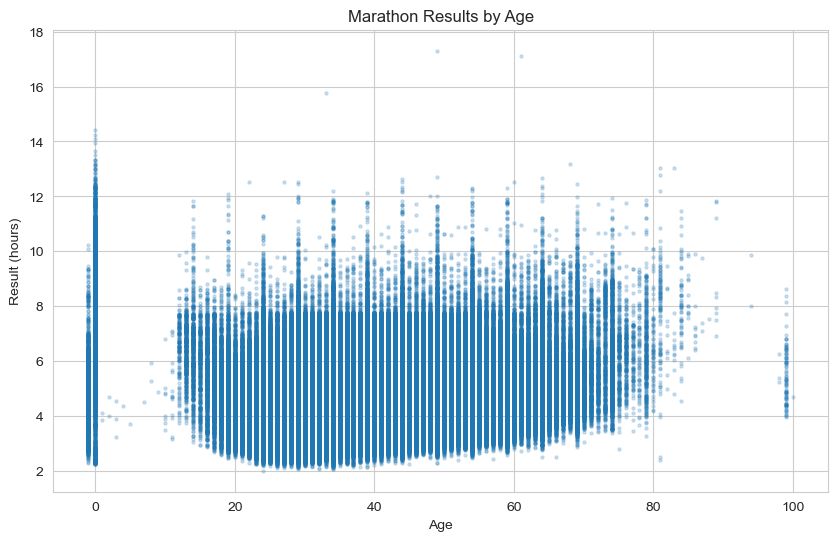

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Result_hr_numeric'], alpha=0.2, s=5)
plt.title('Marathon Results by Age')
plt.xlabel('Age')
plt.ylabel('Result (hours)')
plt.grid(True)
plt.show()

### Let's make a subset of the data to remove outliers

In [19]:
filtered_df = df[
    (df['Age'] >= 18) &
    (df['Age'] <= 70) &
    (df['Result_hr_numeric'] <= 8) &
    (df['Gender'].isin(['M', 'F']))
]

df = filtered_df
df

,Name,Race,Year,Gender,Age,Finish,Age Bracket,Result_hr_numeric,AgeGroup
0,Arunas Jurkus,Salt Lake City Marathon,2023,M,55,12907,55-59,3.585278,55
1,Seth Reed,Salt Lake City Marathon,2023,M,24,12921,Under 35,3.589167,20
2,Mufaro Chivasa,Salt Lake City Marathon,2023,M,54,12948,50-54,3.596667,50
3,Adam Cheney,Salt Lake City Marathon,2023,M,22,12954,Under 35,3.598333,20
4,Michael Pyles,Salt Lake City Marathon,2023,M,33,12964,Under 35,3.601111,30
...,...,...,...,...,...,...,...,...,...
429261,Ake Pangestuti,California International Marathon,2023,F,48,24807,45-49,6.890833,45
429262,Lucy Chow,California International Marathon,2023,F,62,24916,60-64,6.921111,60
429263,David Bry,California International Marathon,2023,M,68,25004,65-69,6.945556,65
429264,Talia Davis,California International Marathon,2023,F,32,25036,Under 35,6.954444,30


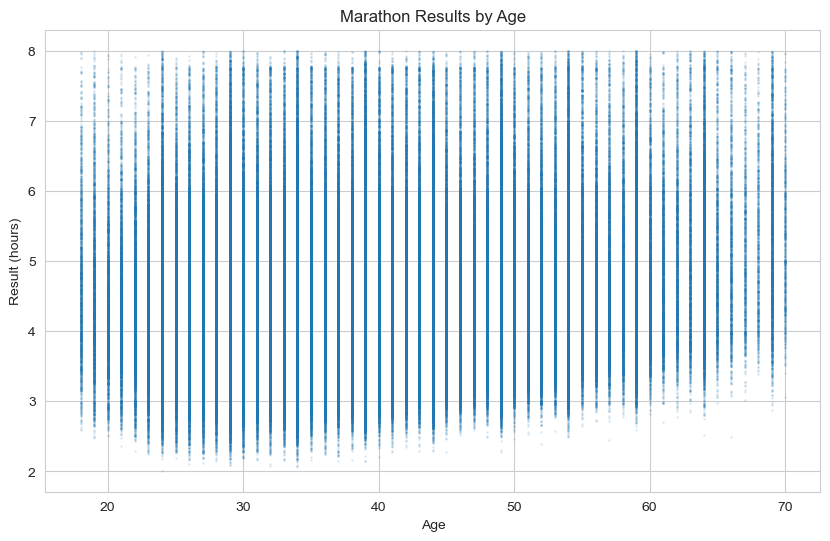

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Result_hr_numeric'], alpha=0.1, s=1)
plt.title('Marathon Results by Age')
plt.xlabel('Age')
plt.ylabel('Result (hours)')
plt.grid(True)
plt.show()

### Let's see some different options to plot time by age

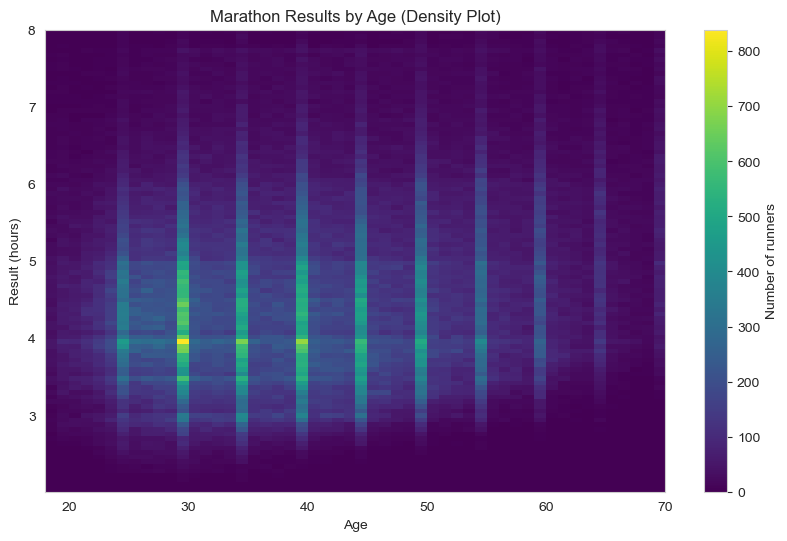

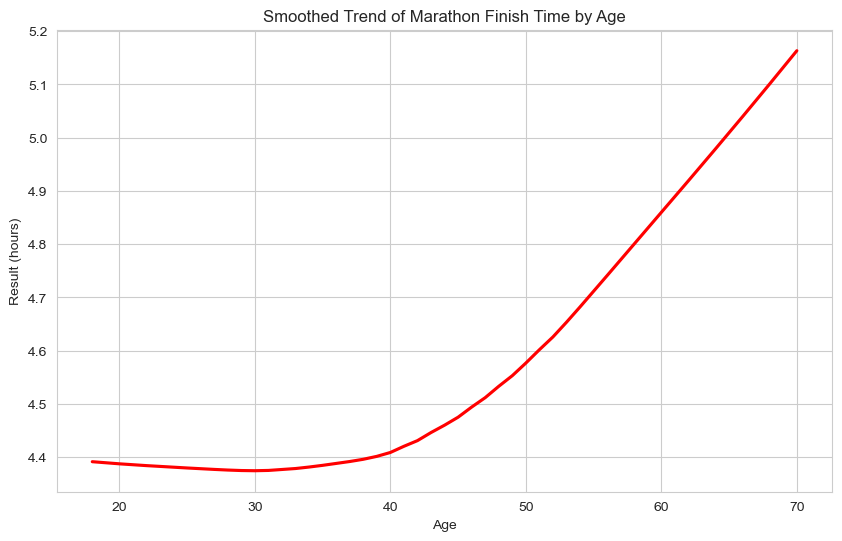

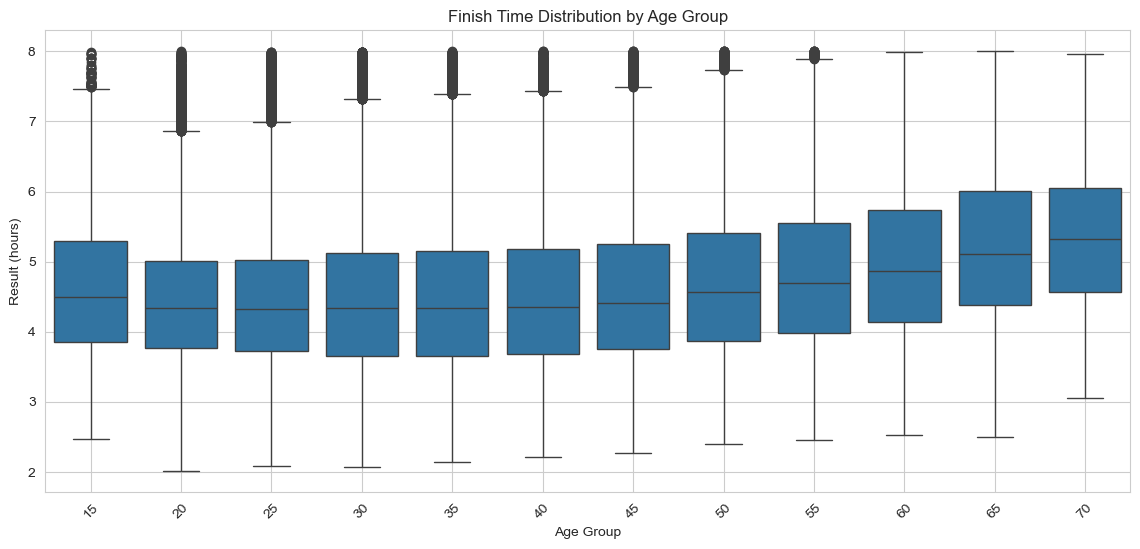

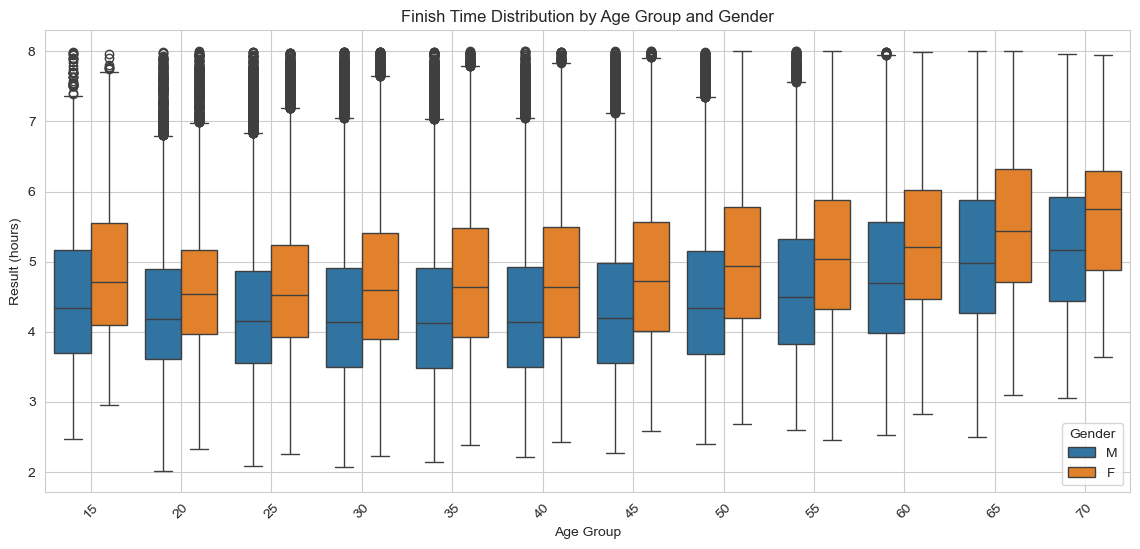

In [21]:
plt.figure(figsize=(10, 6))
plt.hist2d(df['Age'], df['Result_hr_numeric'], bins=[52, 100], cmap='viridis')
plt.colorbar(label='Number of runners')
plt.title('Marathon Results by Age (Density Plot)')
plt.xlabel('Age')
plt.ylabel('Result (hours)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Result_hr_numeric', data=df, scatter=False, lowess=True, line_kws={'color': 'red'})
plt.title('Smoothed Trend of Marathon Finish Time by Age')
plt.xlabel('Age')
plt.ylabel('Result (hours)')
plt.grid(True)
plt.show()

df.loc[:, 'AgeGroup'] = (df['Age'] // 5) * 5 # Group ages into 5-year bins

plt.figure(figsize=(14, 6))
sns.boxplot(x='AgeGroup', y='Result_hr_numeric', data=df)
plt.title('Finish Time Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Result (hours)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='AgeGroup', y='Result_hr_numeric', hue='Gender', data=df)
plt.title('Finish Time Distribution by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Result (hours)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

### Now let's plot by gender again with the core data

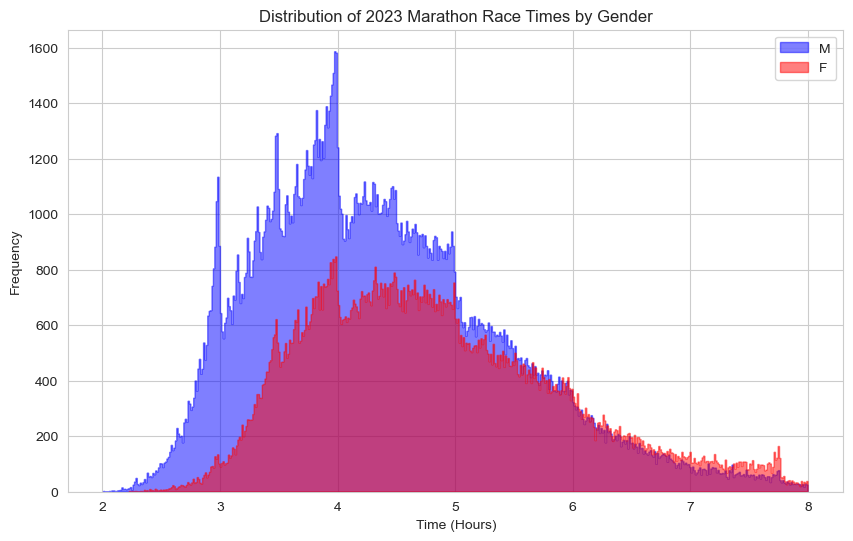

In [27]:
# Plot the distribution of race times by gender
plt.figure(figsize=(10, 6))

for gender, color in zip(['M', 'F'], ['blue', 'red']):
    gender_data = df[df['Gender'] == gender]['Result_hr_numeric']
    plt.hist(gender_data, bins=500, alpha=0.5, color=color, label=gender, edgecolor=color, histtype="stepfilled")

plt.xlabel('Time (Hours)')
plt.ylabel('Frequency')
plt.title('Distribution of 2023 Marathon Race Times by Gender')

plt.legend()
plt.grid(True)
# plt.xlim(2, 8)
plt.show()

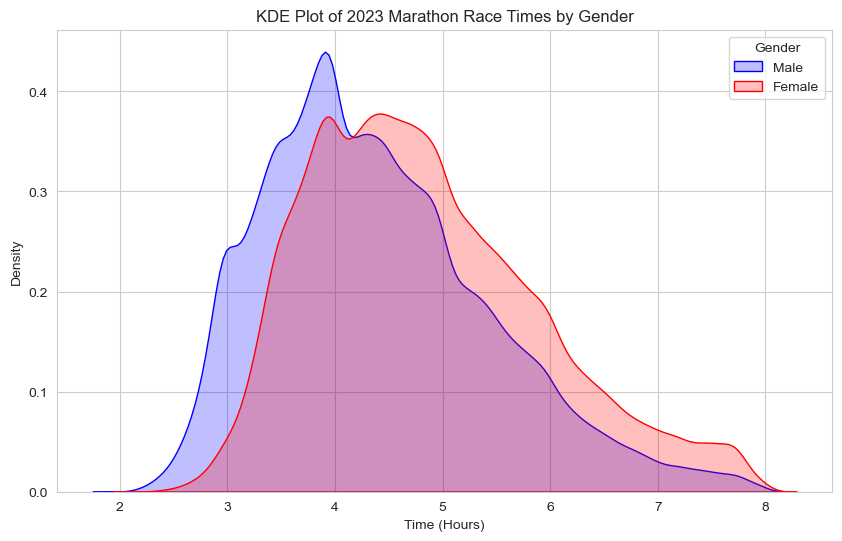

In [23]:
# Set up the Seaborn style
sns.set_style("whitegrid")

# Plot the KDE distribution of race times by gender
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['Gender'] == 'M'], x='Result_hr_numeric', label='Male', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=df[df['Gender'] == 'F'], x='Result_hr_numeric', label='Female', fill=True, common_norm=False, color='red')

plt.xlabel('Time (Hours)')
plt.ylabel('Density')
plt.title('KDE Plot of 2023 Marathon Race Times by Gender')

plt.legend(title='Gender')
# plt.xlim(2, 10)
plt.show()